<a href="https://colab.research.google.com/github/bel4life/Tensorflow-Google-Stock-Project/blob/master/Google_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()


Saving GOOG.csv to GOOG.csv


In [5]:
import io
df = pd.read_csv('GOOG.csv', parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.676899,51.693783,47.669952,49.845802,49.845802,44994500
1,2004-08-20,50.178635,54.187561,49.925285,53.805050,53.805050,23005800
2,2004-08-23,55.017166,56.373344,54.172661,54.346527,54.346527,18393200
3,2004-08-24,55.260582,55.439419,51.450363,52.096165,52.096165,15361800
4,2004-08-25,52.140873,53.651051,51.604362,52.657513,52.657513,9257400


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


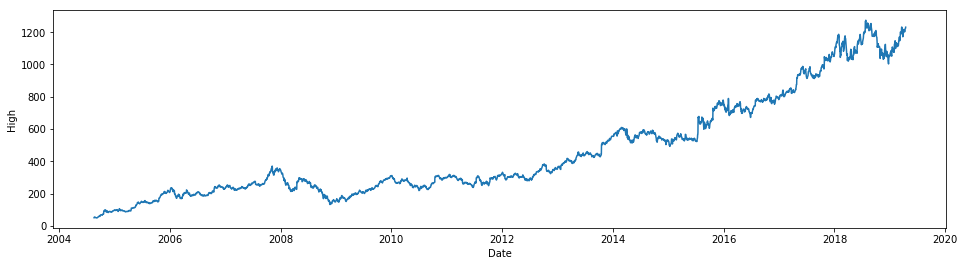

In [6]:
ax, fig = plt.subplots(figsize=(16,4))
sns.lineplot(x = df['Date'], y = df['High'])

In [0]:
df_date = df.set_index('Date')

**Test Train Split**

In [0]:
X_train = df_date[:'2018']
X_test = df_date['2018':]

In [9]:
X_train.shape, X_test.shape

((3617, 6), (324, 6))

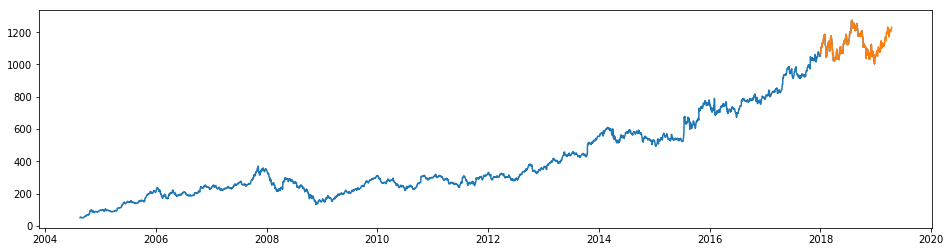

In [10]:
ax, fig = plt.subplots(figsize=(16,4))
plt.plot(X_train['High'])
plt.plot(X_test['High'])

In [0]:
X_train_high = X_train['High']
X_test_high = X_test['High']

In [0]:
X_train_high = np.array(X_train_high)
X_test_high = np.array(X_test_high)

**MinMaxScaling**

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc =MinMaxScaler()
sc.fit(X_train_high.reshape(-1,1))
X_train_scaled = sc.transform(X_train_high.reshape(-1,1))
#X_test_scaled = sc.transform(X_test_high.reshape(-1,1))

In [0]:
window_size = 90

In [0]:
def prepare_data(dataset, window_size):
    X = []
    y = []
    for i in range(window_size,len(dataset)):
        X.append(dataset[i-window_size:i,0])
        y.append(dataset[i,0])

    return np.array(X), np.array(y)

In [0]:
X_train_new, y_train_new = prepare_data(X_train_scaled, window_size)

In [18]:
df_ = df_date[len(df_date) - len(X_test) - window_size:].values
_X_test = np.array(df_[:,1])
_X_test_scaled = sc.transform(_X_test.reshape(-1,1))
X_test_new, y_test_new = prepare_data(_X_test_scaled, window_size)
_X_test_scaled.shape

(414, 1)

In [19]:
X_train_new.shape, y_train_new.shape, X_test_new.shape, y_test_new.shape

((3527, 90), (3527,), (324, 90), (324,))

In [20]:
X_train_new[0] , y_train_new[0]

(array([0.00094209, 0.00298057, 0.0047673 , 0.00400388, 0.00254202,
        0.00252171, 0.00279378, 0.00152277, 0.00079996, 0.00049947,
        0.00025582, 0.        , 0.00010558, 0.00052383, 0.00039389,
        0.00195727, 0.00270851, 0.00416631, 0.00507185, 0.00570939,
        0.00639565, 0.00806461, 0.00758544, 0.00728089, 0.00848286,
        0.00907979, 0.00777224, 0.01041984, 0.01351411, 0.0124096 ,
        0.01319738, 0.01426535, 0.01493943, 0.01490694, 0.01548762,
        0.01540641, 0.01507343, 0.01456584, 0.01697791, 0.01650281,
        0.01776976, 0.01927223, 0.02057166, 0.01918695, 0.01964988,
        0.03184831, 0.03763892, 0.03691204, 0.03564509, 0.03762267,
        0.03988044, 0.03895459, 0.03959619, 0.04055046, 0.03600244,
        0.03271325, 0.02992758, 0.02983013, 0.02874186, 0.03330205,
        0.0357588 , 0.03515781, 0.03156406, 0.0307641 , 0.02951339,
        0.02771043, 0.02751551, 0.02805559, 0.03064633, 0.03179146,
        0.03297719, 0.0329975 , 0.03279446, 0.03

In [0]:
X_train_new = np.reshape(X_train_new , newshape=( len(X_train)-window_size , window_size, 1))
y_train_new = np.reshape(y_train_new , newshape=( len(X_train)-window_size , 1))
X_test_new = np.reshape(X_test_new , newshape=( len(X_test)  , window_size, 1))
y_test_new = np.reshape(y_test_new , newshape=( len(X_test)  ,1))

**Modelling Data**

In [0]:
from tensorflow.python.keras.datasets import imdb
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM, SimpleRNN, Dropout, Flatten
from tensorflow.python.keras.layers import Embedding
from tensorflow.python.keras.preprocessing import sequence
from tensorflow.python.keras.optimizers import Adam

In [23]:
model = Sequential()

model.add(SimpleRNN(50, return_sequences= True , input_shape = (window_size,1)))
model.add(Dropout(0.2))

model.add(SimpleRNN(50, return_sequences= True ))
model.add(Dropout(0.5))

model.add(SimpleRNN(50 ))

model.add(Dense(1, activation='linear'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [24]:
model.compile(loss='mse', optimizer='Adam')

Instructions for updating:
Use tf.cast instead.


In [25]:
model_history = model.fit(X_train_new, y_train_new, epochs=20, batch_size=64)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
3527/3527 [==============================] - 5s 1ms/sample - loss: 0.1201
Epoch 2/20
3527/3527 [==============================] - 3s 963us/sample - loss: 0.0149
Epoch 3/20
3527/3527 [==============================] - 3s 955us/sample - loss: 0.0080
Epoch 4/20
3527/3527 [==============================] - 3s 957us/sample - loss: 0.0061
Epoch 5/20
3527/3527 [==============================] - 3s 964us/sample - loss: 0.0046
Epoch 6/20
3527/3527 [==============================] - 3s 947us/sample - loss: 0.0036
Epoch 7/20
3527/3527 [==============================] - 3s 957us/sample - loss: 0.0032
Epoch 8/20
3527/3527 [==============================] - 3s 951us/sample - loss: 0.0027
Epoch 9/20
3527/3527 [==============================] - 3s 942us/sample - loss: 0.0022
Epoch 10/20
3527/3527 [==============================] - 3s 950us/sample - loss: 0.0021
Epoch 11/20
3527/3527 [==============================] - 3s 951us/sample - loss: 0.

In [26]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 90, 50)            2600      
_________________________________________________________________
dropout (Dropout)            (None, 90, 50)            0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 90, 50)            5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 90, 50)            0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 50)                5050      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 12,751
Trainable params: 12,751
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model.save_weights('model_v1.h5')

**Visualising Losses**

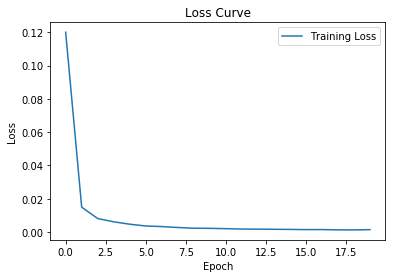

In [28]:
tra_loss = model_history.history['loss']

plt.plot(tra_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend([ 'Training Loss'])
plt.show()

**Testing the Neural Network**

In [0]:
y_pred = model.predict(X_test_new)

In [0]:
y_pred = sc.inverse_transform(y_pred)

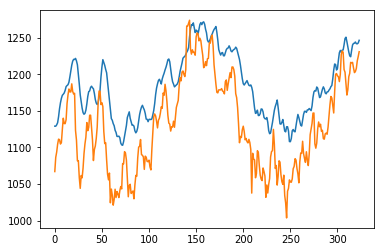

In [32]:
plt.plot(y_pred)
plt.plot( sc.inverse_transform(y_test_new))

In [0]:
rms=np.sqrt(np.mean(np.power((y_pred-sc.inverse_transform(y_test_new)),2)))

In [34]:
rms

61.842221675345485